# Visualizing Categorical and Quantitative Variables

1. Count plots and bar plots
2. Box plots
3. Point plots

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
survey = pd.read_csv('young-people-survey-responses.csv', index_col=0)
survey.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


## 1.1 Count plots and bar plots

### Categorical plots
Count plots and bar plots are two types of visualizations that Seaborn calls "categorical plots". Categorical plots involve a categorical variable, which is a variable that consists of a fixed, typically small number of possible values, or categories. These types of plots are commonly used when we want to make comparisons between different groups. A count plot displays the number of observations in each category.

### catplot( )
Just like we used "relplot( )" to create different types of relational plots, we use "catplot( )" to create different types of categorical plots. "catplot( )" offers the same flexibility that "relplot ()" does, which means it will be easy to create subplots if we need to using the same "col" and "row" parameters.


### countplot( ) vs. catplot( )
To make a plot with "catplot( )" instead of countplot( ), we change the function name to "catplot( )" and use the "kind" parameter to specify what kind of categorical plot to use. In this case, we'll set kind equal to the word "count".


### Changing the order
Sometimes there is a specific ordering of categories that makes sense for these plots. To change the order of the categories, create a list of category values in the order that you want them to appear, and then use the "order" parameter. This works for all types of categorical plots, not just count plots.




### 1.1.1 Count Plots

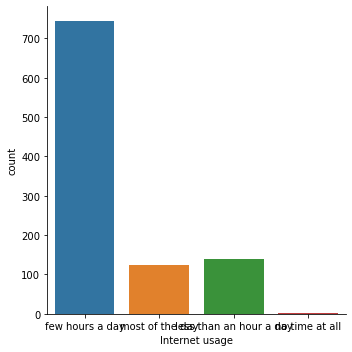

In [3]:
# Use sns.catplot() to create a count plot using the survey_data DataFrame with "Internet usage" on the x-axis.
sns.catplot(x='Internet usage', data=survey, kind='count')

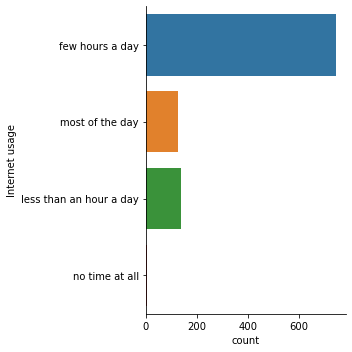

In [4]:
# Make the bars horizontal instead of vertical.
sns.catplot(y='Internet usage', data=survey, kind='count')

In [5]:
# Separate this plot into two side-by-side column subplots based on "Age Category",
# which separates respondents into those that are younger than 21 vs. 21 and older.

survey.Age.unique()

array([20., 19., 22., 18., 17., 24., 25., 27., 21., 23., 26., 28., 16.,
       15., nan, 29., 30.])

In [6]:
# create a new age_category column to differentiate the two categories
survey.loc[survey['Age'] < 21, 'age_category'] = 'Less than 21'
survey.loc[survey['Age'] >= 21, 'age_category'] = '21 and older'

survey.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,age_category
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21 and older
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21


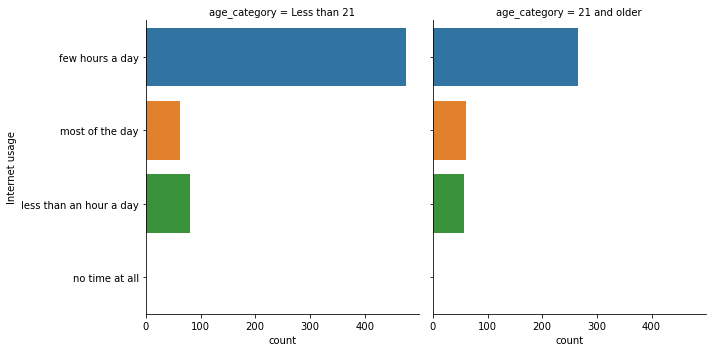

In [7]:
# create the plot
sns.catplot(y='Internet usage', data=survey, kind='count', col='age_category')

### 1.1.2 Bar plots
Bar plots look similar to count plots, but instead of the count of observations in each category, they show the mean of a quantitative variable among observations in each category.To create this bar plot, we use "catplot". Specify the categorical variable on the x-axis, the quantitative variable on the y-axis, and set the "kind" parameter equal to "bar".


### Confidence intervals
Notice also that Seaborn automatically shows 95% confidence intervals for these means. Just like with line plots, these confidence intervals show us the level of uncertainty we have about these estimates. Assuming our data is a random sample of some population, we can be 95% sure that the true population mean in each group lies within the confidence interval shown.


### Turning off confidence intervals
If we want to turn off these confidence intervals, we can do this by setting the "ci" parameter equal to "None" - just like we did with line plots.


### Changing the orientation
Finally, you can also change the orientation of the bars in bar plots and count plots by switching the x and y parameters. However, it is fairly common practice to put the categorical variable on the x-axis.

In [8]:
# Add a new column to show students interested in Math and otherwise.
survey.loc[survey['Mathematics'] >= 4, 'Interested in Math'] = True
survey.loc[survey['Mathematics'] < 4, 'Interested in Math'] = False

survey.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,age_category,Interested in Math
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21,False
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21,True
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21,True
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21 and older,True
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21,False


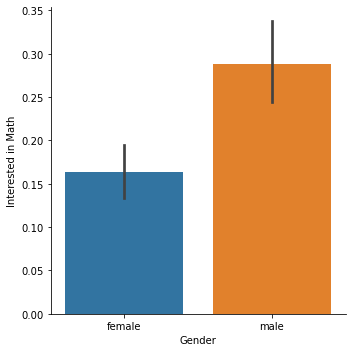

In [9]:
# Use the survey DataFrame and sns.catplot() to create a bar plot with "Gender" on the x-axis and "Interested in Math" on the y-axis.
sns.catplot(x='Gender', y='Interested in Math', data=survey, kind='bar')

 When the y-variable is True/False, bar plots will show the percentage of responses reporting True. This plot shows us that males report a much higher interest in math compared to females.

### Customizing bar plots

In [10]:
# Do students who report higher amounts of studying tend to get better final grades?
#  Let's compare the average final grade among students in each category using a bar plot.

students = pd.read_csv('student-alcohol-consumption.csv', index_col = 0)
students.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


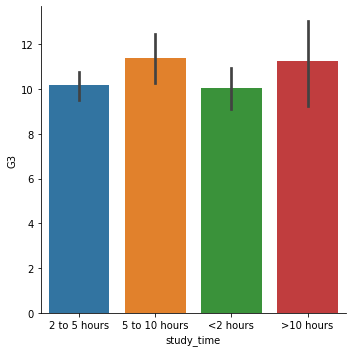

In [11]:
# # Create bar plot of average final grade in each study category
# Use sns.catplot() to create a bar plot with "study_time" on the x-axis and final grade ("G3") on the y-axis, using the student_data DataFrame.
sns.catplot(x='study_time', y='G3', data=students, kind='bar')

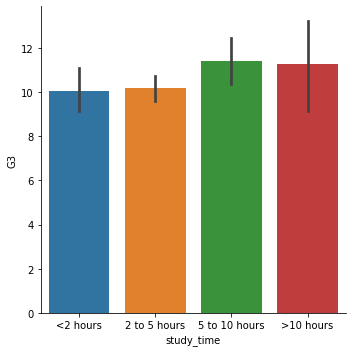

In [12]:
# Using the order parameter and the category_order list that is provided, rearrange the bars so that they are in order from lowest study time to highest.

category_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]
sns.catplot(x='study_time', y='G3', data=students, kind='bar', order=category_order)

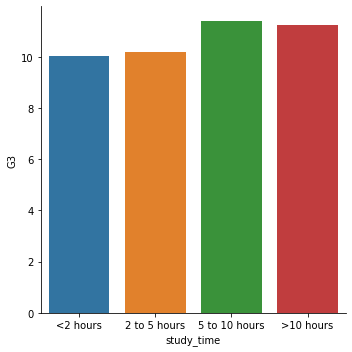

In [13]:
# Update the plot so that it no longer displays confidence intervals.

sns.catplot(x='study_time', y='G3', data=students, kind='bar', order=category_order, ci=None)

## 1.2 Box Plots
A box plot shows the distribution of quantitative data. 

The colored box represents the 25th to 75th percentile, 

and the line in the middle of the box represents the median. 

The whiskers give a sense of the spread of the distribution,

and the floating points represent outliers.
 
Box plots are commonly used as a way to compare the distribution of a quantitative variable across different groups of a categorical variable. To see this, let's look at this example. The box plot shown here uses the tips dataset and compares the distribution of the total bill paid per table across the different days of the week. From this box plot we can quickly see that the median bill is higher on Saturday and Sunday, but the spread of the distribution is also larger. This comparison would be much harder to do with other types of visualizations.

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Creating box plots
While Seaborn does have a "boxplot( )" function, we'll be using the "catplot( )" function because it makes it easy to create subplots using the "col" and "row" parameters. We'll put the categorical variable "day" on the x-axis and the quantitative variable "total bill" on the y-axis. Here, we want box plots, so we'll specify kind="box". That's it! We have a nice looking box plot. 

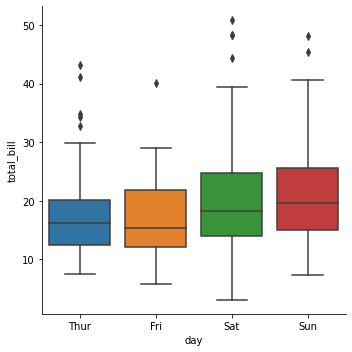

In [15]:
sns.catplot(x='day', y='total_bill', data=tips, kind='box')

### Change the order of categories
As a reminder, "catplot" allows you to change the order of the categories using the "order" parameter. Here, we specified that "dinner" should be shown before "lunch".

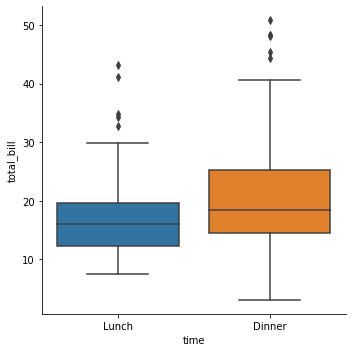

In [16]:
sns.catplot(x='time', y='total_bill', data=tips, kind='box')

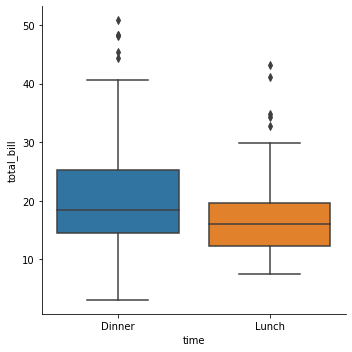

In [17]:
# order Dinner before Lunch.
sns.catplot(x='time', y='total_bill', data=tips, kind='box', order=['Dinner','Lunch'])

### Omitting the outliers using `sym`
Occasionally, you may want to omit the outliers from your box plot. You can do this using the "sym" parameter. If you pass an empty string into "sym", it will omit the outliers from your plot altogether. "Sym" can also be used to change the appearance of the outliers instead of omitting them.

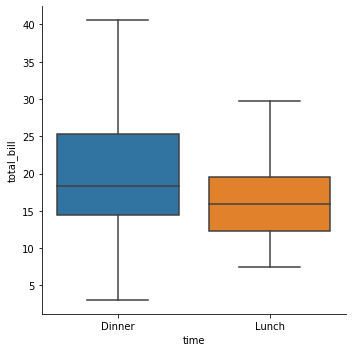

In [18]:
# Omit outliers
sns.catplot(x='time', y='total_bill', data=tips, kind='box', order=['Dinner','Lunch'], sym='')

### Changing the whiskers using `whis`
By default, the whiskers extend to 1.5 times the interquartile range, or "IQR". The IQR is the 25th to the 75th percentile of a distribution of data. If you want to change the way the whiskers in your box plot are defined, you can do this using the "whis" parameter. There are several options for changing the whiskers. You can change the range of the whiskers from 1.5 times the IQR (which is the default) to 2 times the IQR by setting "whis" equal to 2.0. 

Alternatively, you can have the whiskers define specific lower and upper percentiles by passing in a list of the lower and upper values. In this example, passing in "[5, 95]" will result in the lower whisker being drawn at the 5th percentile and the upper whisker being drawn at the 95th percentile.

 Finally, you may just want to draw the whiskers at the min and max values. You can do this by specifying the lower percentile as 0 and the upper percentile as 100.

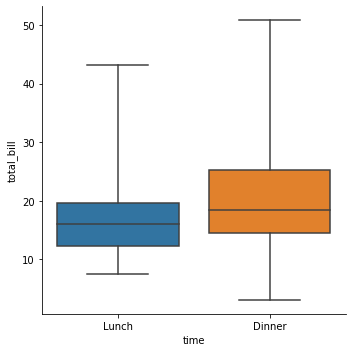

In [19]:
# Here's an example where the whiskers are set to the min and max values. Note that there are no outliers, because the box and whiskers cover the entire range of the data.

sns.catplot(x='time', y='total_bill', data=tips, kind='box', whis=[0,100])


### Create and interpret a box plot


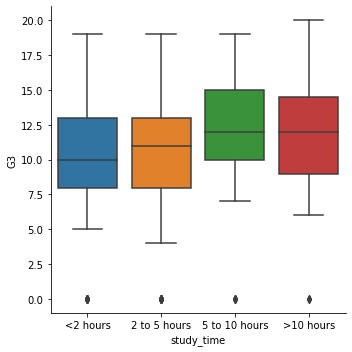

In [20]:
# Use sns.catplot() and the student_data DataFrame to create a box plot with "study_time" on the x-axis and "G3" on the y-axis. 
# Set the ordering of the categories to study_time_order.

study_time_order = ['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']

sns.catplot(x='study_time', y='G3', data=students, kind='box', order=study_time_order)

### Omitting outliers

let's use the students dataset to compare the distribution of final grades ("G3") between students who have internet access at home and those who don't. To do this, we'll use the "internet" variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the "location" variable, which is an indicator of whether a student lives in an urban ("Urban") or rural ("Rural") location.

In [21]:
students.columns

Index(['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'location', 'study_time'],
      dtype='object')

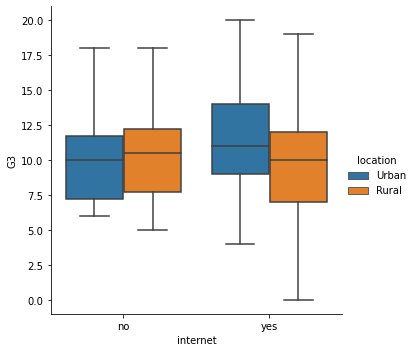

In [22]:
# Use sns.catplot() to create a box plot with the student_data DataFrame, putting "internet" on the x-axis and "G3" on the y-axis.
# Add subgroups so each box plot is colored based on "location".
# Do not display the outliers.
sns.catplot(x='internet', y='G3', data=students, kind='box', hue='location', sym='')

### Adjusting the whiskers
 we'll continue to use the student_data dataset to compare the distribution of final grades ("G3") between students who are in a romantic relationship and those that are not. We'll use the "romantic" variable, which is a yes/no indicator of whether the student is in a romantic relationship.

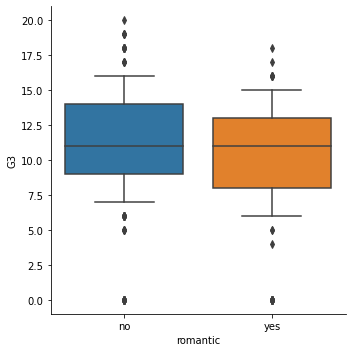

In [23]:
# Adjust the code to make the box plot whiskers to extend to 0.5 * IQR. Recall: the IQR is the interquartile range.
sns.catplot(x='romantic', y='G3', data=students, kind='box', whis=0.5)

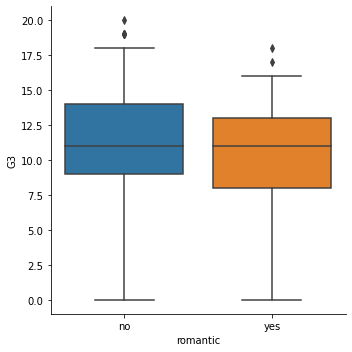

In [24]:
# Change the code to set the whiskers to extend to the 5th and 95th percentiles.
sns.catplot(x='romantic', y='G3', data=students, kind='box', whis=[5,95])

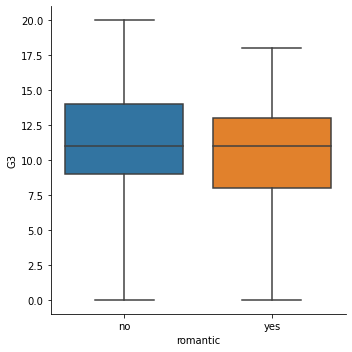

In [25]:
# Change the code to set the whiskers to extend to the min and max values.
sns.catplot(x='romantic', y='G3', data=students, kind='box', whis=[0,100])

## 1.3 Point Plots

Point plots show the mean of a quantitative variable for the observations in each category, plotted as a single point. 

This point plot uses the tips dataset and shows the average bill among smokers versus non-smokers. 

The vertical bars extending above and below the mean represent the 95% confidence intervals for that mean. Just like the confidence intervals we saw in line plots and bar plots, these confidence intervals show us the level of uncertainty we have about these mean estimates. 

Assuming our data is a random sample of some population, we can be 95% sure that the true population mean in each group lies within the confidence interval shown.

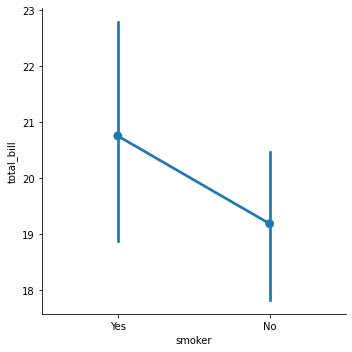

In [26]:

sns.catplot(x='smoker', y='total_bill', data=tips, kind='point')


### Point plots vs. line plots
You may be thinking: point plots look a lot like line plots. What's the difference?

Both line plots and point plots show the mean of a quantitative variable and 95% confidence intervals for the mean. 

However, there is a key difference. Line plots are relational plots, so both the x- and y-axis are quantitative variables. In a point plot, one axis - usually the x-axis - is a categorical variable, making it a categorical plot.

## Point plots vs. bar plots
You may also be thinking: point plots seem to show the same information as bar plots. For each category, both show the mean of a quantitative variable and the confidence intervals for those means. When should we use one over the other? 

In the point plot, it's easier to compare the heights of the subgroup points when they're stacked above each other. In the point plot, it's also easier to look at the differences in slope between the categories than it is to compare the heights of the bars between them.


#### Creating a point plot
We use "catplot" and set "kind" equal to "point".

#### Disconnecting the points
Sometimes we may want to remove the lines connecting each point, perhaps because we only wish to compare within a category group and not between them. To do this, set the "join" parameter equal to False.


#### Displaying the median
To have the points and confidence intervals be calculated for the median instead of the mean, import the median function from the numpy library and set "estimator" equal to the numpy median function. Why might you want to use the median instead of the mean? The median is more robust to outliers, so if your dataset has a lot of outliers, the median may be a better statistic to use.

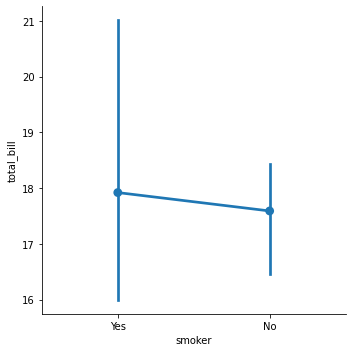

In [27]:
from numpy import median

sns.catplot(x='smoker', y='total_bill', data=tips, kind='point', estimator=median)

#### Customizing the confidence intervals
You can also customize the way that the confidence intervals are displayed. To add “caps” to the end of the confidence intervals, set the “capsize” parameter equal to the desired width of the caps. In this case, we chose a width of 0.2.



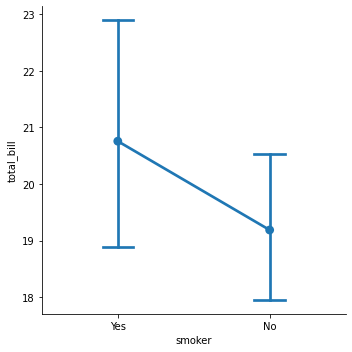

In [28]:
sns.catplot(x='smoker', y='total_bill', data=tips, kind='point', capsize=0.2)

####  Turning off confidence intervals
Finally, like we saw with line plots and bar plots, you can turn the confidence intervals off by setting the "ci" parameter equal to None.

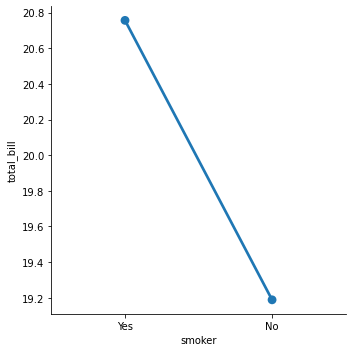

In [29]:
sns.catplot(x='smoker', y='total_bill', data=tips, kind='point', ci=None)

### Customizing point plots
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the "famrel" variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).


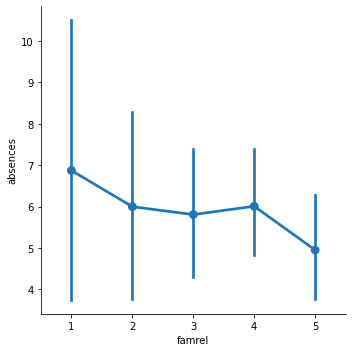

In [30]:
sns.catplot(x='famrel', y='absences', data=students, kind='point')

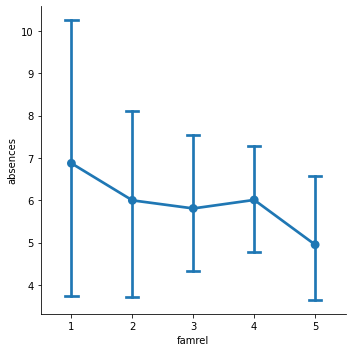

In [31]:
# Add "caps" to the end of the confidence intervals with size 0.2.
sns.catplot(x='famrel', y='absences', data=students, kind='point', capsize=0.2)

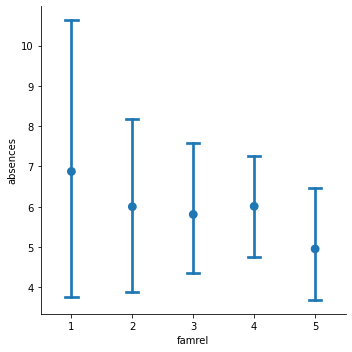

In [32]:
# Remove the lines joining the points in each category.
sns.catplot(x='famrel', y='absences', data=students, kind='point', capsize=0.2, join=False)


### Point plots with subgroups

 Is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

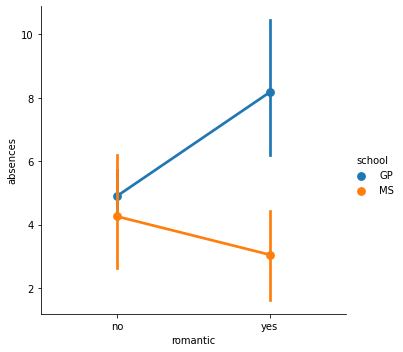

In [33]:
# Use sns.catplot() and the student_data DataFrame to create a point plot with relationship status ("romantic") on the x-axis and number of absences ("absences") on the y-axis. 
# Color the points based on the school that they attend ("school").

sns.catplot(x='romantic', y='absences', data=students, kind='point', hue='school')

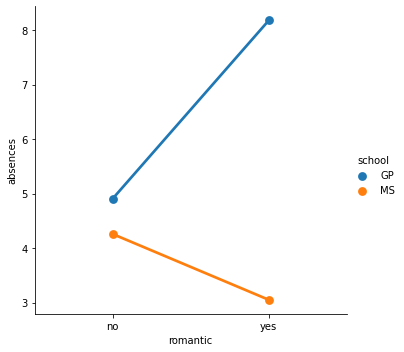

In [34]:
# Turn off the confidence intervals for the plot.
sns.catplot(x='romantic', y='absences', data=students, kind='point', hue='school', ci=None)

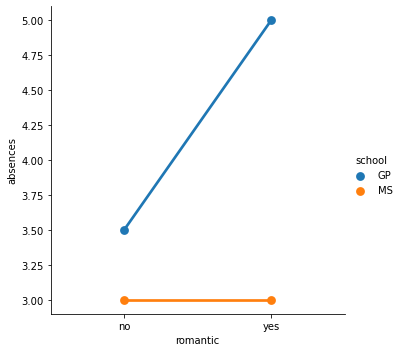

In [35]:
# Since there may be outliers of students with many absences, use the median function that we've imported from numpy
#  to display the median number of absences instead of the average.
from numpy import median

sns.catplot(x='romantic', y='absences', data=students, kind='point', hue='school', ci=None, estimator=median)

 It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.